<a href="https://colab.research.google.com/github/salexey1990/gb/blob/master/ml-business/hw04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

import statsmodels.api as sm
from random import random

from google.colab import files
import io

import itertools
import warnings

In [0]:

uploaded = files.upload()

Saving my_PJME_MW.csv to my_PJME_MW.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['my_PJME_MW.csv']), index_col=[0], parse_dates=[0])
df_m = df.resample('W').mean()

In [0]:
df_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


In [0]:
# функция экспоненциального сглаживания датасета
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [0]:
# функция для подсчёта ошибки модели
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:

# функция разбиения датасета на тестовую и валидационную выборки 
def split_data_b( data, split_date ):
  data = data[['PJME_MW', 'exp_0_01', 't', 't1', 't2']]
  return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
          data.loc[data.index.get_level_values('Date') >  split_date].copy()

In [0]:

df['exp_0_01'] = exponential_smoothing(df['PJME_MW'], 0.01)

In [0]:
df['t'] = 0
df.iloc[1:,14]=df.iloc[:-1,1].values
df['t1']=0
df.iloc[2:,15]=df.iloc[:-2,1].values
df['t2']=0
df.iloc[3:,16]=df.iloc[:-3,1].values
df.fillna(0)
df = df.drop(['Time'], axis=1)
df.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday,exp_0_01,t,t1,t2
Date,,,,,,,,,,,,,,,,
2002-01-01,30393.0,2002,1,1,1,1,1,1,1,1,0,0,30393.000000,0.0,0.0,0.0
2002-01-01,29265.0,2002,1,1,1,1,1,1,2,1,0,0,30381.720000,30393.0,0.0,0.0
2002-01-01,28357.0,2002,1,1,1,1,1,1,3,1,0,0,30361.472800,29265.0,30393.0,0.0
2002-01-01,27899.0,2002,1,1,1,1,1,1,4,1,0,0,30336.848072,28357.0,29265.0,30393.0
2002-01-01,28057.0,2002,1,1,1,1,1,1,5,1,0,0,30314.049591,27899.0,28357.0,29265.0


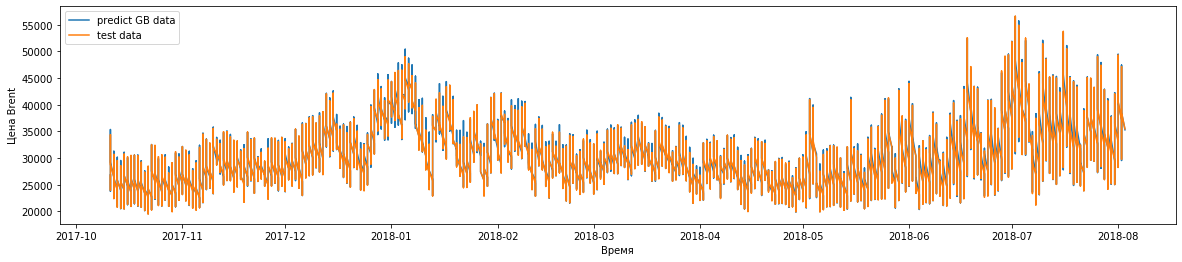

ошибка градиентного бустинга :   1.0583572567423165 %


In [0]:

model_gb_h1 = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
train_b, test_b = split_data_b( df, '10-10-2017')

h=1
X_train_b_h1 = train_b.iloc[:-h,:]
y_train_b_h1 = train_b[df.columns[0]].values[h:]
X_test_b_h1 = test_b.iloc[:-h,:]
y_test_b_h1 = test_b[df.columns[0]].values[h:]

model_gb_h1.fit( X_train_b_h1, y_train_b_h1 ) 
y_test_pred_gb_h1 = model_gb_h1.predict(X_test_b_h1)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(test_b.index[h:],y_test_pred_gb_h1, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b_h1, label='test data')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b_h1, y_pred=y_test_pred_gb_h1)

print('ошибка градиентного бустинга :  ', er_g, '%')

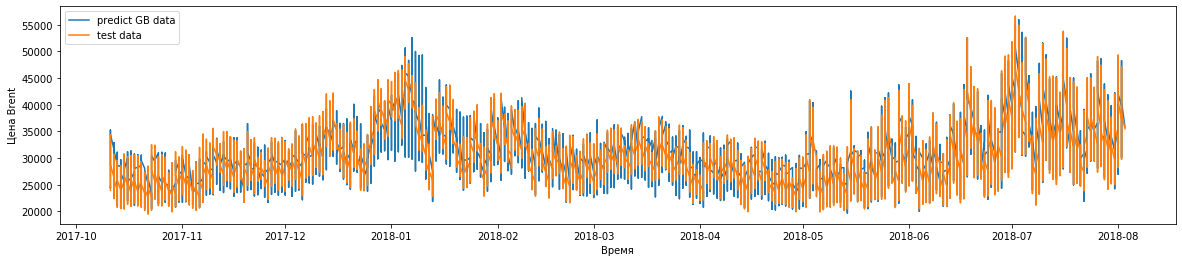

ошибка градиентного бустинга :   5.773828341296543 %


In [0]:

model_gb_h4 = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
train_b, test_b = split_data_b( df, '10-10-2017')

h=4
X_train_b_h4 = train_b.iloc[:-h,:]
y_train_b_h4 = train_b[df.columns[0]].values[h:]
X_test_b_h4 = test_b.iloc[:-h,:]
y_test_b_h4 = test_b[df.columns[0]].values[h:]

model_gb_h4.fit( X_train_b_h4, y_train_b_h4 ) 
y_test_pred_gb_h4 = model_gb_h4.predict(X_test_b_h4)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(test_b.index[h:],y_test_pred_gb_h4, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b_h4, label='test data')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b_h4, y_pred=y_test_pred_gb_h4)

print('ошибка градиентного бустинга :  ', er_g, '%')

[41552.         36904.05239317 43256.         44057.
 45641.        ]
[41552.         36904.05239317 43256.         44057.
 45641.        ]
[41552.         36904.05239317 43256.         44057.
 45641.        ]
[41552.         36904.05239317 43256.         44057.
 45641.        ]


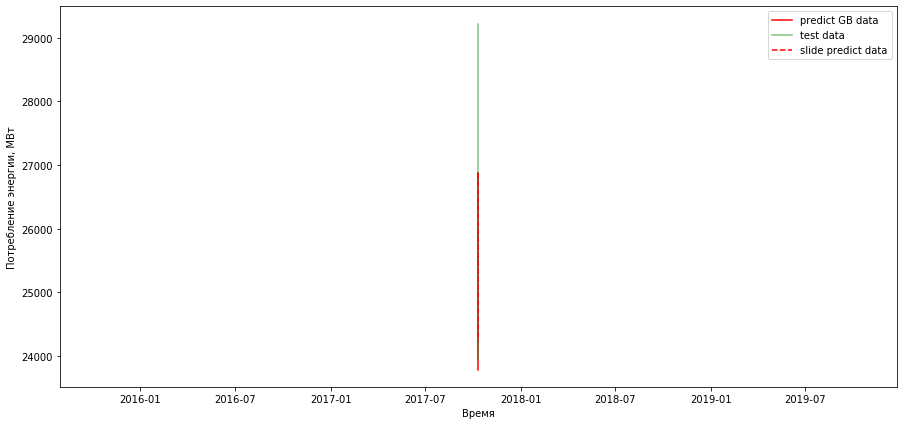

In [0]:
X_test_100 = X_test_b_h1.values
y_test_100 = y_test_pred_gb_h1.copy()
N10 = 4
p=3
for i in range(N10):
    # print(model_gb_h1.predict(X_test_100[i,:].reshape((1,5))))
    y_test_100[i] = model_gb_h1.predict(X_test_100[i,:].reshape((1,5)))
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = y_test_100[i]
    X_test_100[i+1,1] = X_test_100[i,0]*(1-0.01)+ 0.01 * X_test_100[i+1,1]  
    if i>p:
        X_test_100[i+1,2] = np.mean(X_test_100[i+1-p:i+1,0]) 
    print(X_test_100[-2])
        
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(X_test_b.index[1:N10+1],y_test_pred_gb_h1[:N10], 'r',label='predict GB data' )
plt.plot(X_test_b.index[1:N10+1],y_test_b[:N10], 'g',label='test data', alpha=0.5)
plt.plot(X_test_b.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show() 